In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ganzhou cn
peleduy ru
luderitz na
san rafael ar
atuona pf
kaitangata nz
puerto ayora ec
trairi br
saint-paul re
tuatapere nz
rikitea pf
bethel us
busselton au
guerrero negro mx
shaunavon ca
vaini to
bluff nz
san quintin mx
kununurra au
mugur-aksy ru
okhotsk ru
port keats au
bargal so
victoria sc
ushuaia ar
cairns au
tselinnoye ru
magadan ru
hilo us
norman wells ca
ambilobe mg
fortuna us
lensk ru
punta arenas cl
port-gentil ga
kodiak us
vaitape pf
pangai to
port alfred za
cherskiy ru
quesnel ca
bokoro td
vaitupu wf
fortuna us
puerto escondido mx
ancud cl
albany au
albany au
palabuhanratu id
morro bay us
dingle ie
nikolskoye ru
ushuaia ar
illoqqortoormiut gl
avarua ck
thompson ca
kungurtug ru
thiadiaye sn
qaanaaq gl
punta arenas cl
kapaa us
hermanus za
ilulissat gl
dunedin nz
ushuaia ar
leshukonskoye ru
kimbe pg
ruteng id
nishihara jp
homer us
new norfolk au
butaritari ki
port alfred za
leningradskiy ru
castro cl
punta arenas cl
mataura pf
vestmannaeyjar is
georgetown sh
taolanaro mg
leb

pochutla mx
marrakesh ma
cumaribo co
saskylakh ru
whitehorse ca
punta arenas cl
pevek ru
katsuura jp
carnarvon au
fare pf
samusu ws
kazalinsk kz
san vicente ph
cherskiy ru
cape town za
cayenne gf
mys shmidta ru
lompoc us
wawa ca
balaghat in
sao filipe cv
imbituba br
opuwo na
iqaluit ca
torbay ca
busselton au
bethel us
ilulissat gl
castro cl
rapid valley us
port macquarie au
bubaque gw
cape town za
mount gambier au
tasiilaq gl
awbari ly
cidreira br
kapaa us
kathmandu np
olinda br
saint-pierre pm
hobart au
conop ro
saint-pierre pm
orlik ru
asmar af
san patricio mx
taolanaro mg
victoria sc
jamestown sh
ewa beach us
salina us
coquimbo cl
jamestown sh
arraial do cabo br
half moon bay us
paraiso mx
dingle ie
busselton au
safaqis tn
braslav by
nicolas bravo mx
port alfred za
longyearbyen sj
busselton au
cape town za
rikitea pf
tuatapere nz
rio grande br
iquique cl
lavrentiya ru
severo-kurilsk ru
east london za
new norfolk au
punta arenas cl
hofn is
luderitz na
barrow us
hovd mn
rikitea pf
hob

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c66c90587bd629e14b26342be609984f


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ganzhou
Processing Record 2 of Set 1 | peleduy
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | san rafael
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | trairi
Processing Record 9 of Set 1 | saint-paul
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | shaunavon
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | san quintin
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | mugur-aksy
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 | port keats
Processing Record 23 of Set 1 | barg

Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | boundiali
Processing Record 43 of Set 4 | lima
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | buta
Processing Record 47 of Set 4 | srednekolymsk
Processing Record 48 of Set 4 | zychlin
Processing Record 49 of Set 4 | acapulco
Processing Record 50 of Set 4 | ulladulla
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | mutata
Processing Record 4 of Set 5 | blonay
Processing Record 5 of Set 5 | balaipungut
Processing Record 6 of Set 5 | krasnoturansk
Processing Record 7 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 8 of Set 5 | chokurdakh
Processing Record 9 of Set 5 | da nang
Processing Record 10 of Set 5 | ostrovnoy
Processing Record 11 of Set 5 | ponta delgada
Processing Record 12 of Set 5 | saint anthony
Processing Record 13 of Set 5 | saint-leu
Processing Re

Processing Record 30 of Set 8 | kavaratti
Processing Record 31 of Set 8 | marabba
Processing Record 32 of Set 8 | zhezkazgan
Processing Record 33 of Set 8 | french harbor
Processing Record 34 of Set 8 | pimampiro
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | marystown
Processing Record 38 of Set 8 | bonavista
Processing Record 39 of Set 8 | bonfim
Processing Record 40 of Set 8 | guasca
Processing Record 41 of Set 8 | tulum
Processing Record 42 of Set 8 | zapolyarnyy
Processing Record 43 of Set 8 | karaul
City not found. Skipping...
Processing Record 44 of Set 8 | uaua
Processing Record 45 of Set 8 | bahia honda
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 8 | boyabat
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | pochutla
Processing Record 1 of Set 9 | marrakesh
Processing Record 2 of Set 9 | cumaribo

Processing Record 15 of Set 12 | braganca
Processing Record 16 of Set 12 | bilibino
Processing Record 17 of Set 12 | mundo nuevo
Processing Record 18 of Set 12 | mount darwin
Processing Record 19 of Set 12 | mocambique
City not found. Skipping...
Processing Record 20 of Set 12 | pangkalanbuun
Processing Record 21 of Set 12 | ampanihy
Processing Record 22 of Set 12 | sumbe
Processing Record 23 of Set 12 | promysla
City not found. Skipping...
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | berlevag
Processing Record 28 of Set 12 | stornoway
Processing Record 29 of Set 12 | sioux lookout
Processing Record 30 of Set 12 | broken hill
Processing Record 31 of Set 12 | geresk
City not found. Skipping...
Processing Record 32 of Set 12 | tenenkou
Processing Record 33 of Set 12 | timizart
Processing Record 34 of Set 12 | bilma
Processing Record 35 of Set 12 

In [11]:
# Print the city data to confirm sufficient count.
len(city_data)

547

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ganzhou,28.82,115.43,77.97,83,0,2.39,CN,2020-08-22 19:35:34
1,Peleduy,59.63,112.74,53.44,63,89,8.93,RU,2020-08-22 19:35:35
2,Luderitz,-26.65,15.16,67.64,26,0,9.75,NA,2020-08-22 19:26:18
3,San Rafael,-34.62,-68.33,68.68,20,0,20.47,AR,2020-08-22 19:35:35
4,Atuona,-9.80,-139.03,78.35,78,4,19.35,PF,2020-08-22 19:25:48
5,Kaitangata,-46.28,169.85,50.00,83,100,5.99,NZ,2020-08-22 19:26:21
6,Puerto Ayora,-0.74,-90.35,75.20,60,60,17.22,EC,2020-08-22 19:26:40
7,Trairi,-3.28,-39.27,82.17,62,4,14.50,BR,2020-08-22 19:22:40
8,Saint-Paul,-21.01,55.27,71.60,53,90,12.75,RE,2020-08-22 19:35:36
9,Tuatapere,-46.13,167.68,39.00,97,100,1.01,NZ,2020-08-22 19:27:41


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ganzhou,CN,2020-08-22 19:35:34,28.82,115.43,77.97,83,0,2.39
1,Peleduy,RU,2020-08-22 19:35:35,59.63,112.74,53.44,63,89,8.93
2,Luderitz,NA,2020-08-22 19:26:18,-26.65,15.16,67.64,26,0,9.75
3,San Rafael,AR,2020-08-22 19:35:35,-34.62,-68.33,68.68,20,0,20.47
4,Atuona,PF,2020-08-22 19:25:48,-9.80,-139.03,78.35,78,4,19.35
...,...,...,...,...,...,...,...,...,...
542,San Pedro,PH,2020-08-22 19:37:42,14.35,121.02,80.60,88,100,2.24
543,Wajima,JP,2020-08-22 19:37:42,37.40,136.90,76.51,84,99,9.01
544,Umm Lajj,SA,2020-08-22 19:37:42,25.02,37.27,83.93,64,76,5.95
545,Yangcun,CN,2020-08-22 19:37:43,39.36,117.06,72.00,94,16,2.24


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

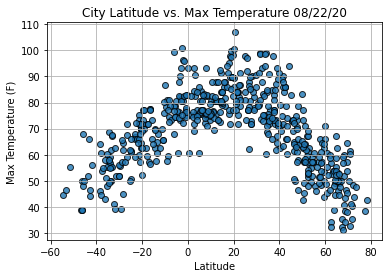

In [16]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

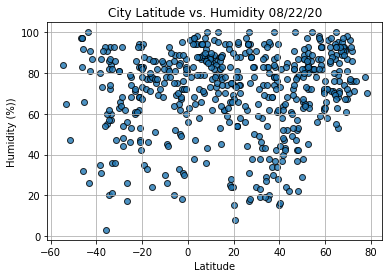

In [17]:

# Build the scatter plot for latitude vs. humdidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

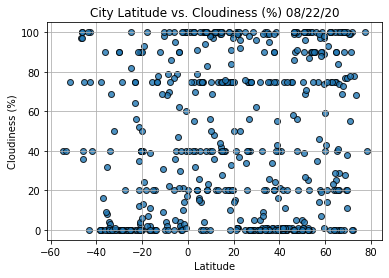

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

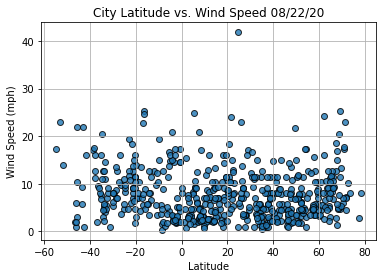

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City               Guerrero Negro
Country                        MX
Date          2020-08-22 19:27:26
Lat                         27.98
Lng                       -114.06
Max Temp                    90.34
Humidity                       38
Cloudiness                      0
Wind Speed                   7.76
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
542     True
543     True
544     True
545     True
546    False
Name: Lat, Length: 547, dtype: bool

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

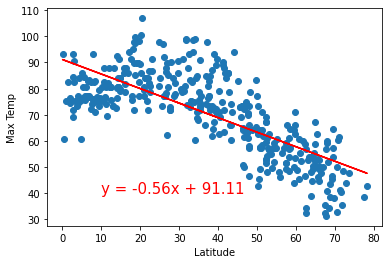

In [24]:
from scipy.stats import linregress
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

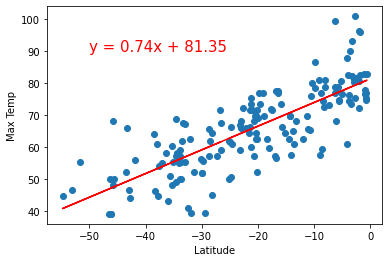

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

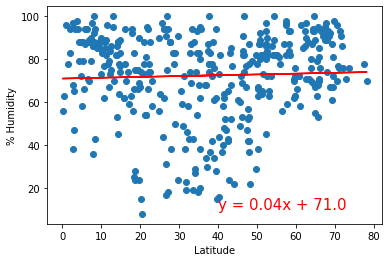

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

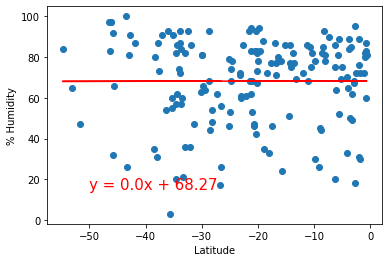

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

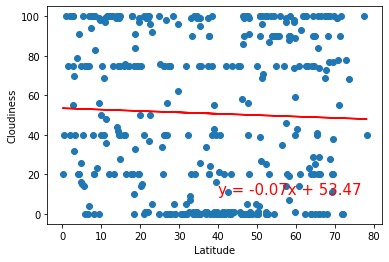

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Cloudiness', 'Cloudiness',(40,10))

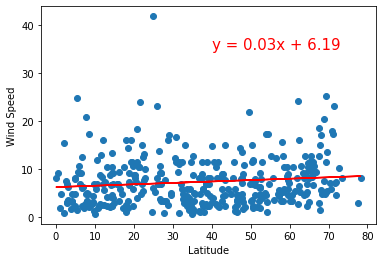

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

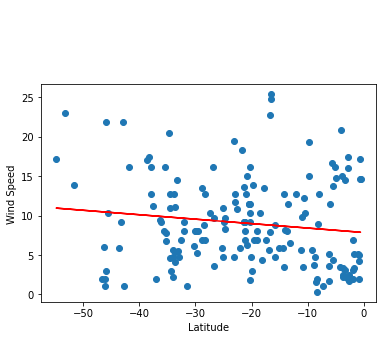

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))